# Import modelflow

In [1]:
from modelclass import model
model.widescreen()

from modeldekom import totdif

# Load model and data, and run 

In [3]:
masia,baseline = model.modelload('Asia_sep7.pcim',run=1,silent=1,progressbar=1)

Solving Asia_7sept:   0%|          | 0/30

# Make experiment with Cambodia

In [4]:
altdf = baseline.copy()
altdf.loc[2021:2021,'KHM_GCARBR_A'] = altdf.loc[2021:2021,'KHM_GCARBR_A'] + 20  
        

altres = masia(altdf,2021,2050,silent=1,first_test = 4,ljit=0,progressbar = 1)

Solving Asia_7sept:   0%|          | 0/30

# Display the impact

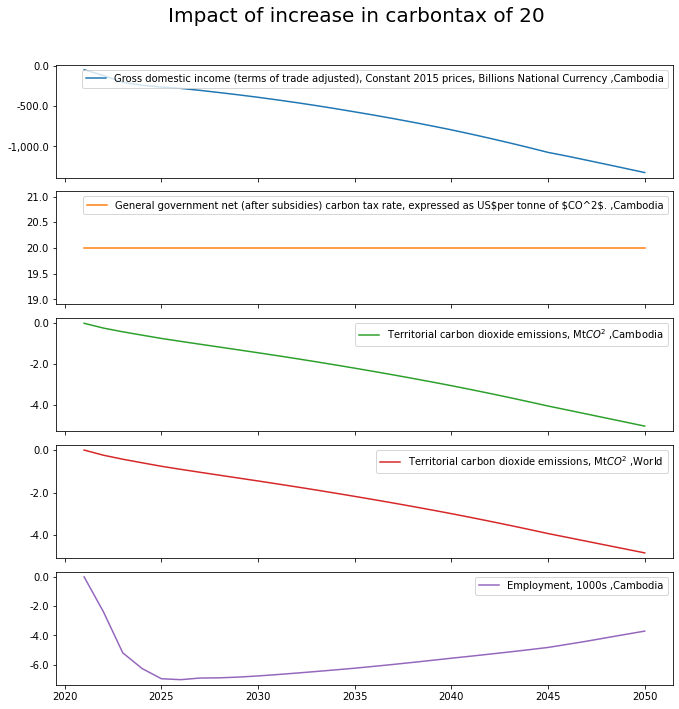

In [5]:
masia['KHM_GDI KHM_GCARBR KHM_CO2 WLD_CO2 KHM_LNN'].dif.rename().plot(colrow=1,sharey=0,title='Impact of increase in carbontax of 20');

# Trace out some relations, just for testing 

In [6]:
masia.modeldash('WLD_CO2',jupyter=True,show_trigger=False,debug=False) 

C:\Users\bruger\miniconda3\lib\site-packages\plotly\graph_objs\_deprecations.py:378: DeprecationWarning: plotly.graph_objs.Line is deprecated.
Please replace it with one of the following more specific types
  - plotly.graph_objs.scatter.Line
  - plotly.graph_objs.layout.shape.Line
  - etc.

  warnings.warn(
 * Running on http://127.0.0.1:5001/ (Press CTRL+C to quit)
127.0.0.1 - - [09/Sep/2021 09:25:55] "GET / HTTP/1.1" 200 -
127.0.0.1 - - [09/Sep/2021 09:25:55] "GET /_dash-component-suites/dash_renderer/react@16.v1_1_2m1576595738.8.6.min.js HTTP/1.1" 200 -
127.0.0.1 - - [09/Sep/2021 09:25:55] "GET /_dash-component-suites/dash_renderer/react-dom@16.v1_1_2m1576595738.8.6.min.js HTTP/1.1" 200 -
127.0.0.1 - - [09/Sep/2021 09:25:55] "GET /_alive_52f4e09f-d8f7-4e39-b267-c644477159a3 HTTP/1.1" 200 -


Dash app running on http://127.0.0.1:5001/


127.0.0.1 - - [09/Sep/2021 09:25:55] "GET /_dash-component-suites/dash_renderer/prop-types@15.v1_1_2m1576595738.7.2.min.js HTTP/1.1" 200 -
127.0.0.1 - - [09/Sep/2021 09:25:55] "GET /_dash-component-suites/dash_core_components/highlight.v1_3_1m1576595950.pack.js HTTP/1.1" 200 -
127.0.0.1 - - [09/Sep/2021 09:25:55] "GET /_dash-component-suites/dash_core_components/dash_core_components.v1_3_1m1576595950.min.js HTTP/1.1" 200 -
127.0.0.1 - - [09/Sep/2021 09:25:55] "GET /_dash-component-suites/dash_interactive_graphviz/dash_interactive_graphviz.v0_3_0m1619943799.min.js HTTP/1.1" 200 -
127.0.0.1 - - [09/Sep/2021 09:25:55] "GET /_dash-component-suites/dash_core_components/plotly-1.v1_3_1m1576595950.50.1.min.js HTTP/1.1" 200 -
127.0.0.1 - - [09/Sep/2021 09:25:55] "GET /_dash-component-suites/dash_bootstrap_components/_components/dash_bootstrap_components.v0_12_2m1620178268.min.js HTTP/1.1" 200 -
127.0.0.1 - - [09/Sep/2021 09:25:55] "GET /_dash-component-suites/dash_html_components/dash_html_com

In [6]:
masia.modeldash('IDN_YER',jupyter=True,show_trigger=False,debug=False,port=5003) 

127.0.0.1 - - [08/Aug/2021 14:31:09] "GET /_dash-dependencies HTTP/1.1" 200 -
127.0.0.1 - - [08/Aug/2021 14:31:09] "GET /_dash-layout HTTP/1.1" 200 -
C:\Users\bruger\miniconda3\lib\site-packages\plotly\graph_objs\_deprecations.py:378: DeprecationWarning: plotly.graph_objs.Line is deprecated.
Please replace it with one of the following more specific types
  - plotly.graph_objs.scatter.Line
  - plotly.graph_objs.layout.shape.Line
  - etc.

  warnings.warn(
127.0.0.1 - - [08/Aug/2021 14:31:11] "POST /_dash-update-component HTTP/1.1" 200 -
C:\Users\bruger\miniconda3\lib\site-packages\plotly\graph_objs\_deprecations.py:378: DeprecationWarning: plotly.graph_objs.Line is deprecated.
Please replace it with one of the following more specific types
  - plotly.graph_objs.scatter.Line
  - plotly.graph_objs.layout.shape.Line
  - etc.

  warnings.warn(
 * Running on http://127.0.0.1:5003/ (Press CTRL+C to quit)
127.0.0.1 - - [08/Aug/2021 14:31:20] "GET / HTTP/1.1" 200 -
127.0.0.1 - - [08/Aug/2021 14

Dash app running on http://127.0.0.1:5003/


# Define the same experiment for several countries.
This is just an example, will be wrapped in function later

In [7]:
countries = 'KHM IDN MYS'.split()
altdf = baseline.copy()
for country in countries:
    altdf.loc[2021:2021,country+'_GCARBR_A'] = altdf.loc[2021:2021,country+'_GCARBR_A'] + 20  
        

altres = masia(altdf,2021,2050,silent=1,first_test = 4,ljit=0)

outvar = 'GDI GCARBR CO2 LNN'.split()
displayvar = ' '.join(country+'_'+var for country in countries for var in outvar)+' WLD_CO2'

Solving Asia_7sept:   0%|          | 0/30

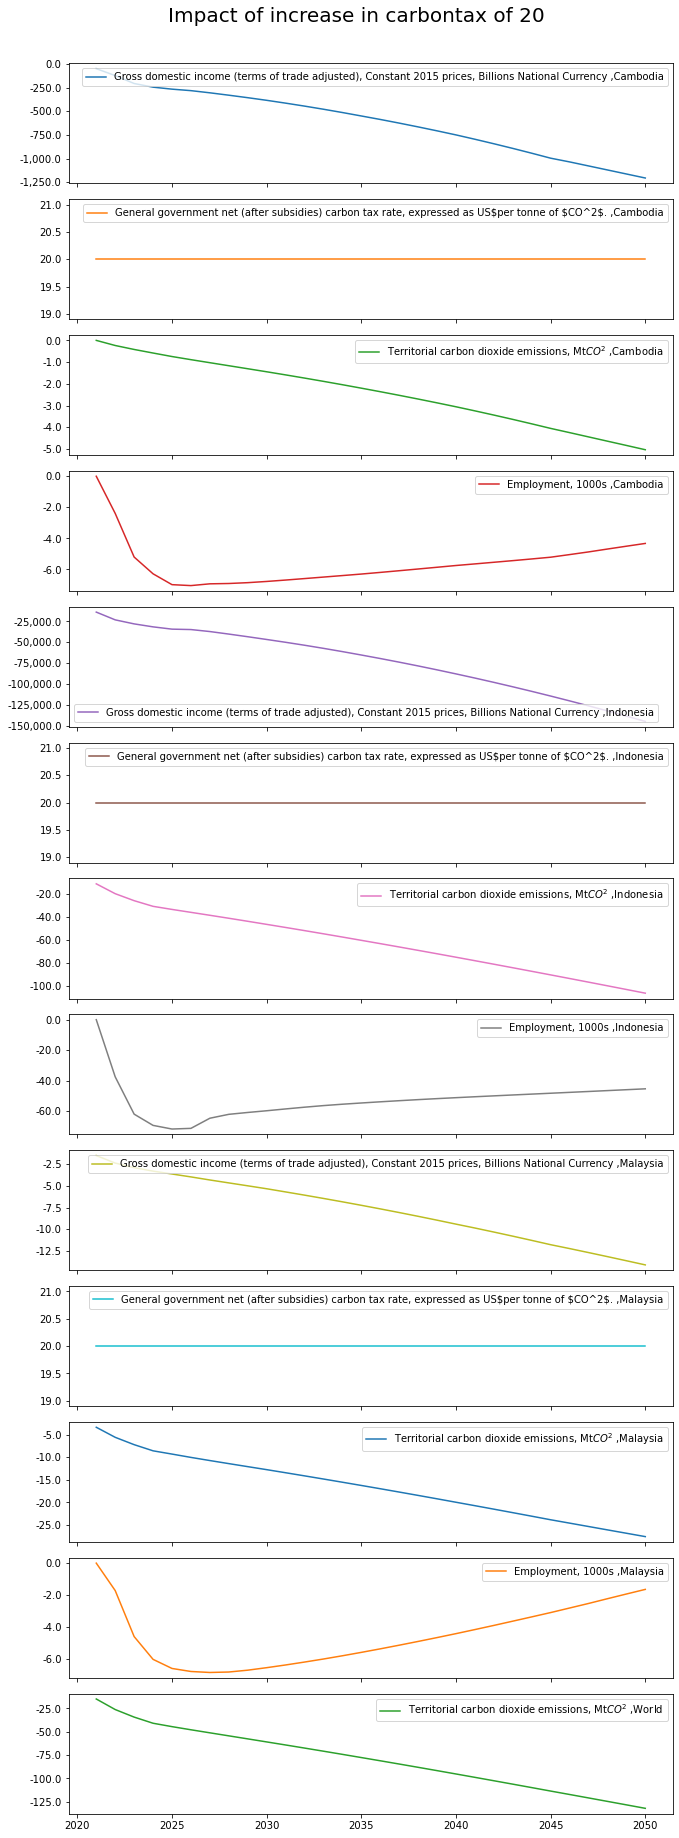

In [8]:
masia[displayvar].dif.rename().plot(colrow=1,sharey=0,top=0.95,title='Impact of increase in carbontax of 20');

In [9]:
experiments = {country : country+'_GCARBR_A' for country in countries}
experiments

{'KHM': 'KHM_GCARBR_A', 'IDN': 'IDN_GCARBR_A', 'MYS': 'MYS_GCARBR_A'}

In [10]:
xx = totdif(masia,summaryvar=displayvar,experiments = experiments)


Solving Asia_7sept:   0%|          | 0/30

Solving Asia_7sept:   0%|          | 0/30

Solving Asia_7sept:   0%|          | 0/30

Total dekomp took       :        16.3 Seconds


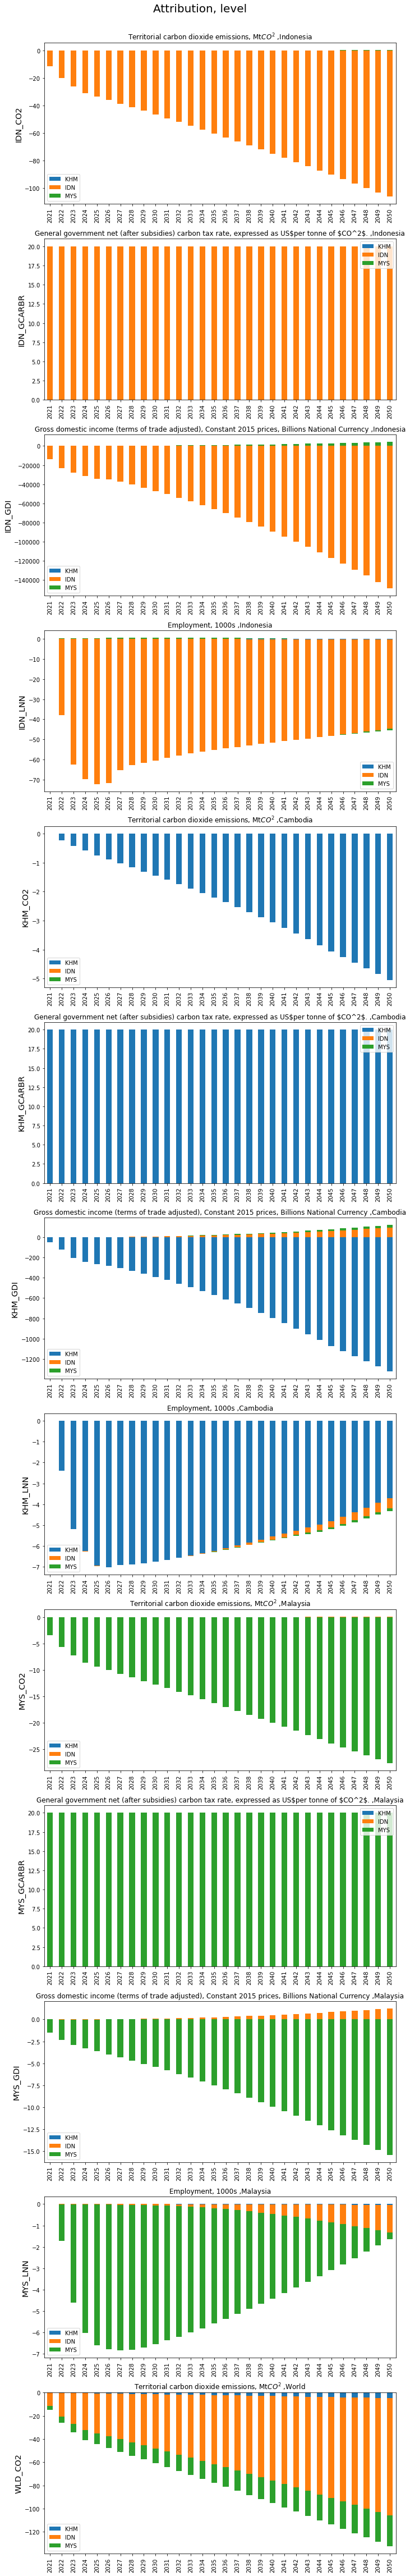

In [11]:
xx.desdic = masia.var_description
fig = xx.explain_all(displayvar,top=0.965);